## Fully Connected Network Test

Testing whether a fully connected network can be over-trained to discriminate between two opposite directions of motion.

In [82]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from assets.neural_net import TwoLayerNet
from assets.motion import Translate

%matplotlib nbagg
#plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
#plt.rcParams['image.interpolation'] = 'nearest'
#plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [102]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.
x = 16
y = 16
t = 4
ns = [20,40,60]
vs = [1]
theta_pull = [0,1,2,3]
thetas = [0,np.pi*0.5,np.pi,np.pi*1.5]
cs = [1.0]
reps = 40

x_data = np.zeros((len(ns)*len(vs)*len(thetas)*len(cs)*reps,x*y*t))
y_data = []
count = 0

for n in ns:
    for v in vs:
        for c in cs:
            for theta in theta_pull:
                mot = Translate(x,y,t,n,v,thetas[theta],c)
                for r in range(reps):
                    y_data.append(theta)
                    mot.gen()
                    x_data[count,:] = np.reshape(mot.data,(1,x*y*t))
                    count =+ 1
                    
y_data = np.asarray(y_data)

In [103]:
print x_data.shape
print y_data.shape

(480L, 1024L)
(480L,)


In [104]:
X_train = x_data[0:400,:]
y_train = y_data[0:400,]
X_val = x_data[400:440,:]
y_val = y_data[400:440,]
X_test = x_data[440:,:]
y_test = y_data[440:,]
print 'Train data shape: ', X_train.shape
print 'Train labels shape: ', y_train.shape
print 'Validation data shape: ', X_val.shape
print 'Validation labels shape: ', y_val.shape
print 'Test data shape: ', X_test.shape
print 'Test labels shape: ', y_test.shape

Train data shape:  (400L, 1024L)
Train labels shape:  (400L,)
Validation data shape:  (40L, 1024L)
Validation labels shape:  (40L,)
Test data shape:  (40L, 1024L)
Test labels shape:  (40L,)


In [105]:
input_size = 16 * 16 * 4
hidden_size = 50
num_classes = 4
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=200000, batch_size=200,
            learning_rate=1, learning_rate_decay=0.999,
            reg=0.001, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print 'Validation accuracy: ', val_acc

iteration 0 / 200000: loss 1.386294
iteration 100 / 200000: loss 1.364279
iteration 200 / 200000: loss 1.378611
iteration 300 / 200000: loss 1.366050
iteration 400 / 200000: loss 1.346591
iteration 500 / 200000: loss 1.352198
iteration 600 / 200000: loss 1.379086
iteration 700 / 200000: loss 1.347234
iteration 800 / 200000: loss 1.345657
iteration 900 / 200000: loss 1.365376
iteration 1000 / 200000: loss 1.364605
iteration 1100 / 200000: loss 1.360591
iteration 1200 / 200000: loss 1.344989
iteration 1300 / 200000: loss 1.356070
iteration 1400 / 200000: loss 1.360551
iteration 1500 / 200000: loss 1.353018
iteration 1600 / 200000: loss 1.328432
iteration 1700 / 200000: loss 1.368198
iteration 1800 / 200000: loss 1.333925
iteration 1900 / 200000: loss 1.343288
iteration 2000 / 200000: loss 1.343795
iteration 2100 / 200000: loss 1.365039
iteration 2200 / 200000: loss 1.363174
iteration 2300 / 200000: loss 1.384959
iteration 2400 / 200000: loss 1.354583
iteration 2500 / 200000: loss 1.35880

KeyboardInterrupt: 

<IPython.core.display.Javascript object>


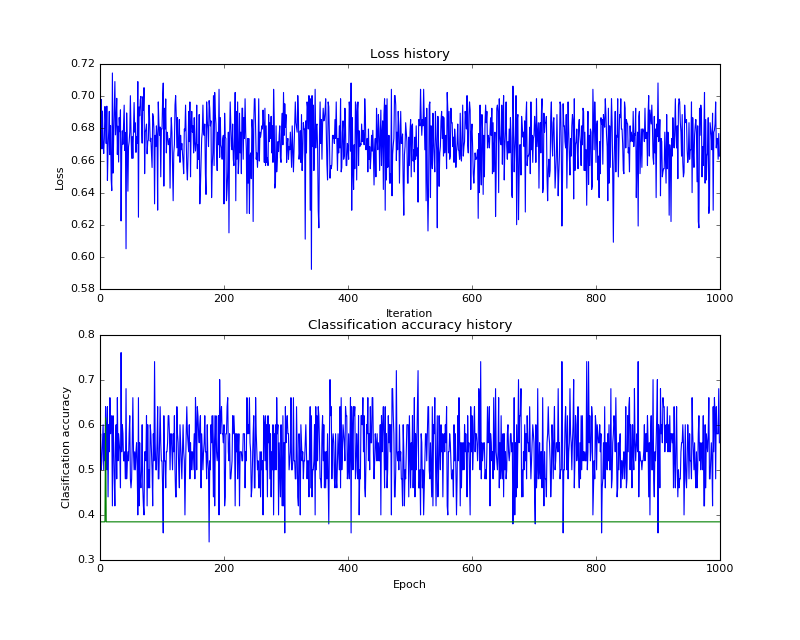

In [72]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.show()

In [83]:
from assets.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
  W1 = net.params['W1']
  W1 = W1.reshape(16, 16, 16, -1).transpose(3, 0, 1, 2)
  ani = mot.plot_dat(W1)

show_net_weights(net)

AttributeError: Translate instance has no attribute 'plot_dat'

<IPython.core.display.Javascript object>


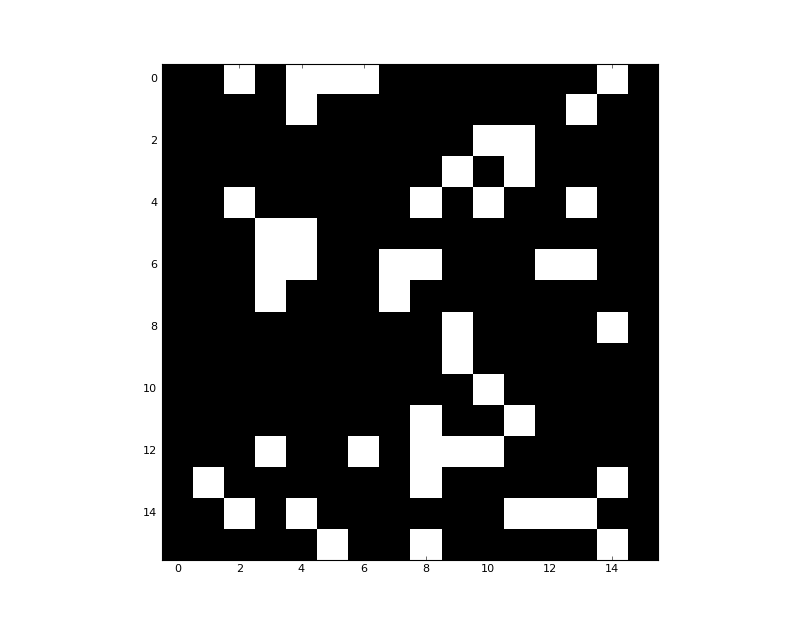

In [86]:
mot.plot()